In [2]:
setwd("/liulab/galib/dlbcl_manuscript/")
library(rBCS)
library(tidyverse)
library(Seurat)
library(harmony)
library(viridis)
library(RColorBrewer)
library(Polychrome)
PurpleAndYellow()
library(ComplexHeatmap)
library(devtools)
library(presto)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(readxl)

Warning message:
“package ‘rBCS’ was built under R version 4.1.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.1.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.1 

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘forcats’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching SeuratObject

Attaching sp

Warning message:
“package ‘harmony’ was built under R version 4.1.3”
Loading required package: Rcpp

Warning message:
“package ‘Rcpp’ was built under R version 4.1.2”
Loading required package: viridisLite

Warning message:
“pack

[1] "#FF00FF" "#F400F4" "#EA00EA" "#DF00DF" "#D500D5" "#CA00CA" "#BF00BF"
 [8] "#B500B5" "#AA00AA" "#9F009F" "#950095" "#8A008A" "#800080" "#750075"
[15] "#6A006A" "#600060" "#550055" "#4A004A" "#400040" "#350035" "#2B002B"
[22] "#200020" "#150015" "#0B000B" "#000000" "#000000" "#0B0B00" "#151500"
[29] "#202000" "#2B2B00" "#353500" "#404000" "#4A4A00" "#555500" "#606000"
[36] "#6A6A00" "#757500" "#808000" "#8A8A00" "#959500" "#9F9F00" "#AAAA00"
[43] "#B5B500" "#BFBF00" "#CACA00" "#D4D400" "#DFDF00" "#EAEA00" "#F4F400"
[50] "#FFFF00"

Warning message:
“package ‘ComplexHeatmap’ was built under R version 4.1.3”
Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


Loading required package: usethis

Warning message:
“package ‘presto’ was built under R version 4.1.3”
Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The

In [18]:
cd3_pos_cd8_neg<- readRDS("./data/objects/cd3_pos_cd8_neg_c22_c25_removed.rds")
cd3_pos_cd4_neg<- readRDS("./data/objects/cd3_pos_cd4_neg_clusters_removed.rds")
B_cell<- readRDS("./data/objects/B_cell_c26_c28_c35_removed.rds")
non_B_non_T<- readRDS("data/objects/non_B_non_T_c18_subclustered.rds")

### cd3_pos_cd8_neg space

In [97]:
cd3_pos_cd8_neg_col<- read_excel(path = "./data/CD3+_CD8-_HEX-colors.xlsx", col_names = TRUE)
cd3_pos_cd8_neg$seurat_clusters<- gsub('4_a', '4a', cd3_pos_cd8_neg$seurat_clusters)
cd3_pos_cd8_neg$seurat_clusters<- gsub('4_b', '4b', cd3_pos_cd8_neg$seurat_clusters)
cd3_pos_cd8_neg$seurat_clusters<- factor(cd3_pos_cd8_neg$seurat_clusters, levels = str_sort(cd3_pos_cd8_neg$seurat_clusters  %>% unique(), numeric = TRUE))

cd3_pos_cd8_neg_col$Cluster_number<- as.factor(cd3_pos_cd8_neg_col$Cluster_number)
cd3_pos_cd8_neg_col_meta<- left_join(cd3_pos_cd8_neg@meta.data, cd3_pos_cd8_neg_col, 
                                     by = c("seurat_clusters" = "Cluster_number"))

cd3_pos_cd8_neg$HEX_code<- cd3_pos_cd8_neg_col_meta$HEX_code

Rows: 18 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): seurat_clusters, annotation

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 54485    27

[1] 54485    26

.
                0_Naïve        1_Exhausted CTLs                2_Th1/EM 
                   9879                    9732                    5296 
       3_Effector Tregs       4a_Exhausted CTLs                4b_Naïve 
                   4897                    2704                    1203 
                  5_Tfh        6_Activated CTLs      7_Follicular Tregs 
                   3015                    2387                    2198 
                8_Other                   9_NKT       10_Effector Tregs 
                   2038                    1980                    1977 
       11_Cycling Tregs              12_Cycling 13_Early activated CTLs 
                   1589                    1492                    1261 
      15_IFN-stimulated              17_Cycling        24_Cycling Tregs 
                   1161                     988                     688 

.
   0    1    2    3   4a   4b    5    6    7    8    9   10   11   12   13   15 
9879 9732 5296 4897 2704 1203 3015 2387 2198 2038 1980 1977 1589 1492 1261 1161 
  17   24 
 988  688 

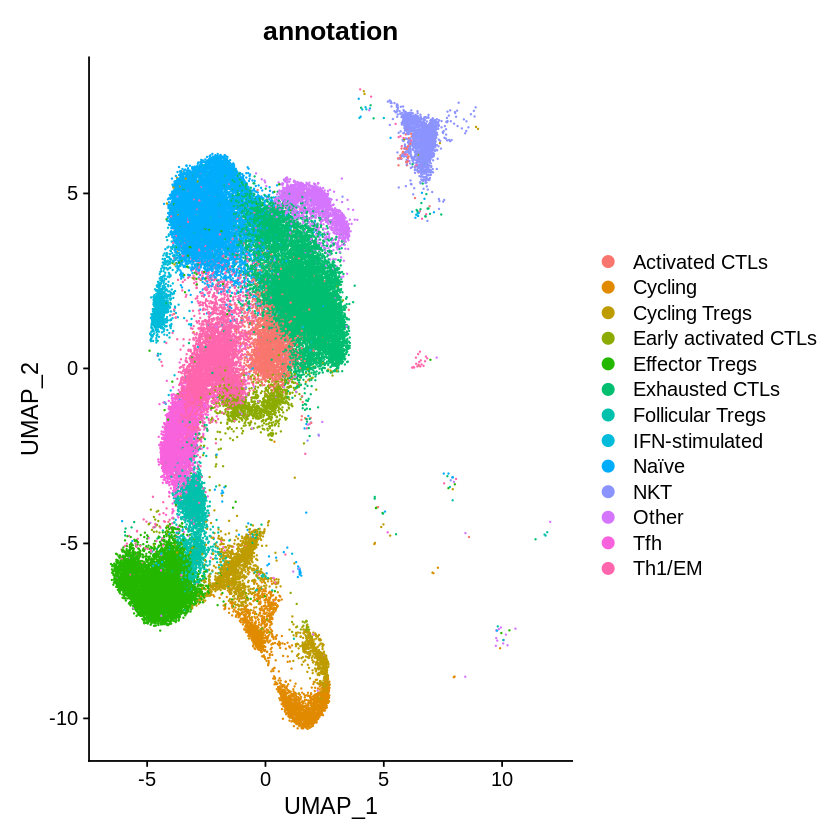

In [98]:
cd3_pos_cd8_neg_annotation<- read_tsv("./data/cd3_pos_cd8_neg_final_annotation.tsv", 
                                      col_names = c("seurat_clusters", "annotation"))


cd3_pos_cd8_neg_annotation$seurat_clusters<- factor(cd3_pos_cd8_neg_annotation$seurat_clusters, levels = str_sort(cd3_pos_cd8_neg_annotation$seurat_clusters, numeric = TRUE))

cd3_pos_cd8_neg_annotated_meta<- left_join(cd3_pos_cd8_neg@meta.data, cd3_pos_cd8_neg_annotation, by = "seurat_clusters")
write_tsv(x = cd3_pos_cd8_neg_annotated_meta, "./data/cd3_pos_cd8_neg_final_annotated_meta.tsv", col_names = TRUE)



cd3_pos_cd8_neg_annotated_meta  %>% dim()
cd3_pos_cd8_neg@meta.data  %>% dim()

cd3_pos_cd8_neg$annotation<- as.factor(cd3_pos_cd8_neg_annotated_meta$annotation)


DimPlot(cd3_pos_cd8_neg, group.by = "annotation")
new_annotation<- paste0(cd3_pos_cd8_neg$seurat_clusters, "_", cd3_pos_cd8_neg$annotation)

cd3_pos_cd8_neg$new_annotation<- factor(new_annotation, levels = str_sort(new_annotation  %>% unique(), numeric = TRUE))

cd3_pos_cd8_neg$new_annotation  %>% table()
cd3_pos_cd8_neg$seurat_clusters  %>% table()

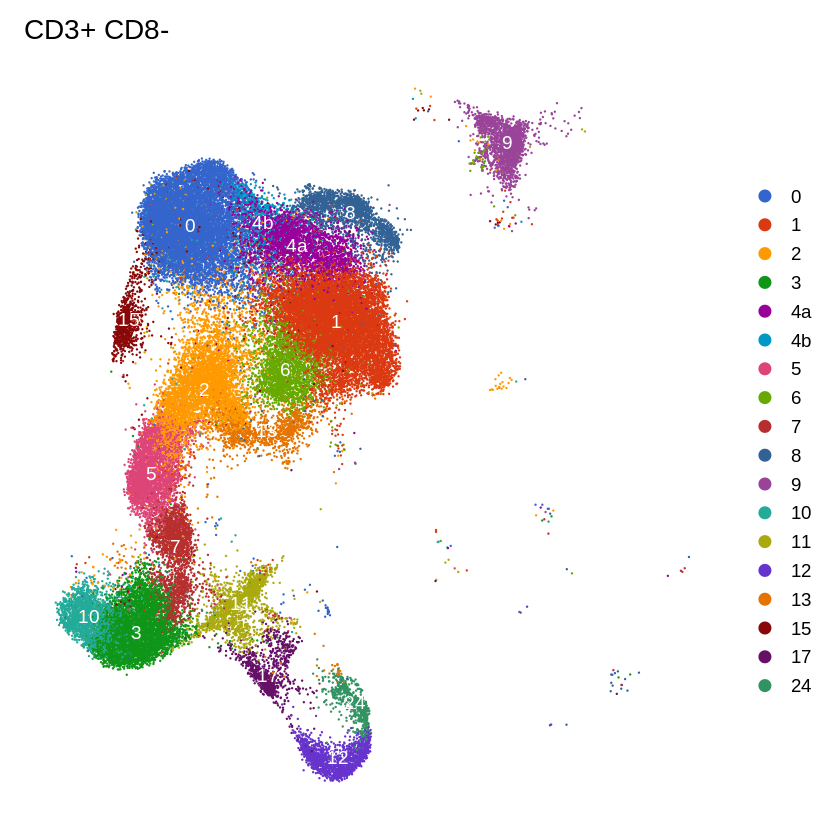

In [104]:
DimPlot(cd3_pos_cd8_neg, group.by = "seurat_clusters", cols = cd3_pos_cd8_neg_col$HEX_code, 
        label = TRUE, label.color = "white", label.size = 4) +
     theme_pubr() + labs(x = "UMAP1", y = "UMAP2", title = "CD3+ CD8-") +
    theme(text = element_text(size = 14), legend.position = 'right') + NoAxes()

ggsave("./results/figures/3_cd3_pos_cd8_neg_final_annotated_umap_labeled.pdf", width = 6, height = 5 )

DimPlot(cd3_pos_cd8_neg, group.by = "new_annotation", cols = cd3_pos_cd8_neg_col$HEX_code) +
     theme_pubr() + labs(x = "UMAP1", y = "UMAP2", title = "CD3+ CD8-") +
    theme(text = element_text(size = 14), legend.position = 'right') + NoAxes()

ggsave("./results/figures/3_cd3_pos_cd8_neg_final_annotated_umap.pdf", width = 8, height = 5 )

saveRDS(object = cd3_pos_cd8_neg, file = "./data/objects/cd3_pos_cd8_neg_final.rds")
ExportSeuratObject(cd3_pos_cd8_neg, "./data/objects/cd3_pos_cd8_neg_final.bcs", overwrite=TRUE)

### cd3_pos_cd4_neg space

In [45]:
cd3_pos_cd4_neg_col<- read_excel(path = "./data/CD3+_CD4-_HEX-colors.xlsx", col_names = TRUE)
cd3_pos_cd4_neg_col$Cluster_number<- as.factor(cd3_pos_cd4_neg_col$Cluster_number)
cd3_pos_cd4_neg_col_meta<- left_join(cd3_pos_cd4_neg@meta.data, cd3_pos_cd4_neg_col, 
                                     by = c("seurat_clusters" = "Cluster_number"))

cd3_pos_cd4_neg$HEX_code<- cd3_pos_cd4_neg_col_meta$HEX_code

Rows: 13 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): annotation
dbl (1): seurat_clusters

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining, by = "seurat_clusters"


[1] 31533    26

[1] 31533    25

.
                     0_Naïve                      1_CM/EM 
                        7186                         6652 
            2_Exhausted CTLs             3_Activated CTLs 
                        3586                         2313 
                     4_Naïve                      5_Other 
                        2204                         1627 
                     6_CM/EM                      7_CM/EM 
                        1623                         1506 
  8_Precursor exhausted CTLs    9_Non-exhausted effectors 
                        1286                         1118 
                  11_Cycling      13_Early exhausted CTLs 
                         965                          804 
16_Terminally exhausted CTLs 
                         663 

.
   0    1    2    3    4    5    6    7    8    9   11   13   16 
7186 6652 3586 2313 2204 1627 1623 1506 1286 1118  965  804  663 

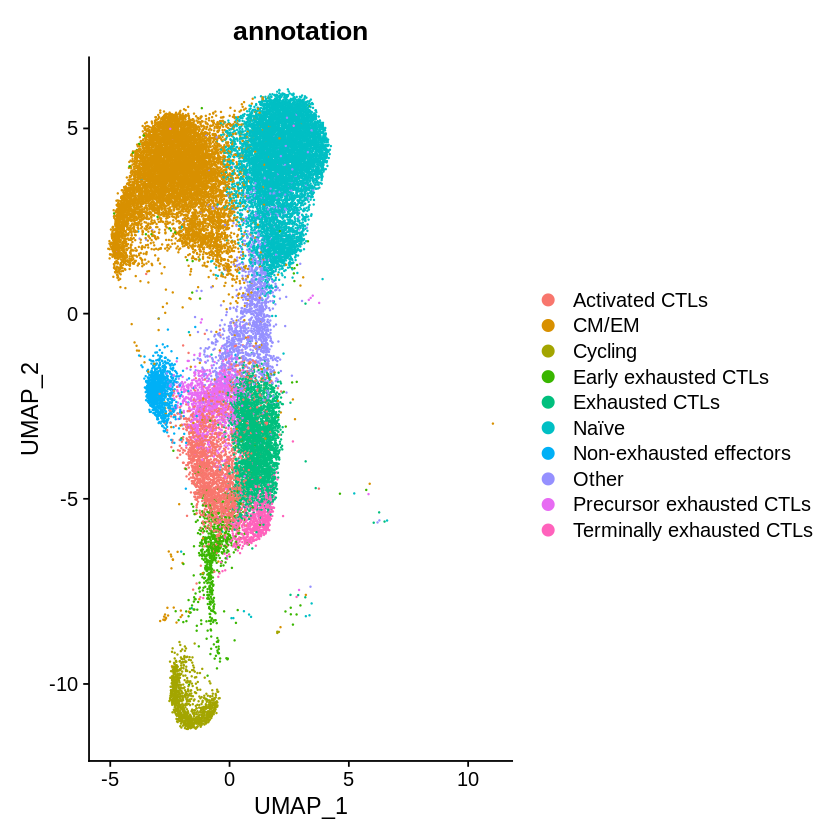

In [46]:
cd3_pos_cd4_neg_annotation<- read_tsv("./data/cd3_pos_cd4_neg_annotation.tsv", 
                                      col_names = c("seurat_clusters", "annotation"))

cd3_pos_cd4_neg_annotation$seurat_clusters<- factor(cd3_pos_cd4_neg_annotation$seurat_clusters, levels = str_sort(cd3_pos_cd4_neg_annotation$seurat_clusters, numeric = TRUE))

cd3_pos_cd4_neg_annotated_meta<- left_join(cd3_pos_cd4_neg@meta.data, cd3_pos_cd4_neg_annotation)
write_tsv(x = cd3_pos_cd4_neg_annotated_meta, "./data/cd3_pos_cd4_neg_final_annotated_meta.tsv", col_names = TRUE)

cd3_pos_cd4_neg_annotated_meta  %>% dim()
cd3_pos_cd4_neg@meta.data  %>% dim()

cd3_pos_cd4_neg$annotation<- as.factor(cd3_pos_cd4_neg_annotated_meta$annotation)

DimPlot(cd3_pos_cd4_neg, group.by = "annotation")
new_annotation<- paste0(cd3_pos_cd4_neg$seurat_clusters, "_", cd3_pos_cd4_neg$annotation)

cd3_pos_cd4_neg$new_annotation<- factor(new_annotation, levels = str_sort(new_annotation  %>% unique(), numeric = TRUE))

cd3_pos_cd4_neg$new_annotation  %>% table()
cd3_pos_cd4_neg$seurat_clusters  %>% table()

Warning message:
“`ExportSeuratObject()` was deprecated in rBCS 0.1.0.
Please use `ExportSeurat()` instead.”
Warning message in ValidateInput():
“cd3_pos_cd8_neg_final.bcs will be replaced”


[2024-02-03 22:37:19] Initializing... 
[2024-02-03 22:37:20] Extracting expressions... 
[2024-02-03 22:37:20] Extracting metadata... 
[2024-02-03 22:37:20] Extracting dimred... 
[2024-02-03 22:37:20] Writing data... 


Warning message in dir.create(file.path(study.path, "main"), recursive = TRUE):
“'ccde8e3a-9450-42b1-b734-05a1ae0fe73c/main' already exists”


[2024-02-03 22:37:20] Writing column sums... 
[2024-02-03 22:37:21] Writing matrices... 
[2024-02-03 22:37:55] Writing metadata... 
[2024-02-03 22:38:01] Writing cell embeddings... 
[2024-02-03 22:38:01] Writing intermediate embeddings... 


You created a large dataset with compression and chunking.
The chunk size is equal to the dataset dimensions.
If you want to read subsets of the dataset, you should testsmaller chunk sizes to improve read times.

You created a large dataset with compression and chunking.
The chunk size is equal to the dataset dimensions.
If you want to read subsets of the dataset, you should testsmaller chunk sizes to improve read times.



[2024-02-03 22:38:04] Writing general information... 
[2024-02-03 22:38:04] Compressing data... 


[1] TRUE

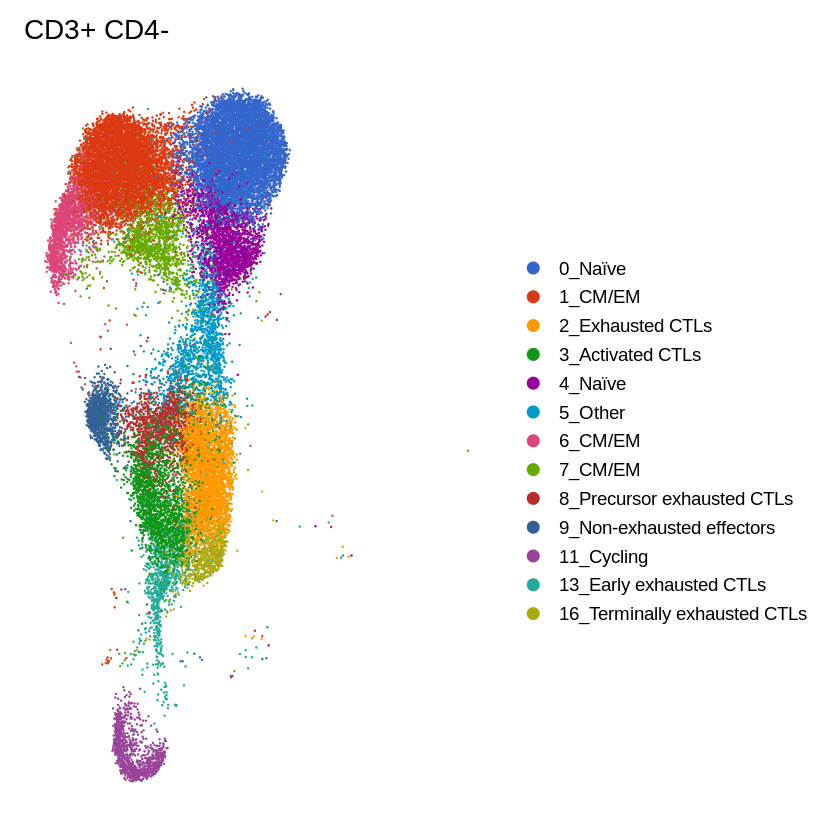

In [47]:
p_cd4_neg<- DimPlot(cd3_pos_cd4_neg, group.by = "new_annotation", cols = cd3_pos_cd4_neg_col$HEX_code) +
     theme_pubr() + labs(x = "UMAP1", y = "UMAP2", title = "CD3+ CD4-") +
    theme(text = element_text(size = 14), legend.position = 'right') + NoAxes()
p_cd4_neg

ggsave("./results/figures/3_cd3_pos_cd4_neg_final_annotated_umap.pdf", width = 8, height = 5 )


saveRDS(object = cd3_pos_cd4_neg, file = "./data/objects/cd3_pos_cd4_neg_final.rds")
ExportSeuratObject(cd3_pos_cd8_neg, "./data/objects/cd3_pos_cd8_neg_final.bcs", overwrite=TRUE)

### B_cell space

In [19]:
B_cell_col<- read_excel(path = "./data/B_cells_HEX-colors.xlsx", col_names = TRUE)
B_cell_col$Cluster_number<- as.factor(B_cell_col$Cluster_number)
B_cell_col_meta<- left_join(B_cell@meta.data, B_cell_col, 
                                     by = c("seurat_clusters" = "Cluster_number"))

B_cell$HEX_code<- B_cell_col_meta$HEX_code

Rows: 27 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): annotation
dbl (1): seurat_clusters

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining, by = "seurat_clusters"


[1] 176583     26

[1] 176583     25

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



.
                0_Follicular              1_Marginal Zone 
                       33780                        15208 
         2_Transitional (T2)    3_Atypical CD21lowCD23low 
                       11335                        10056 
       4_Atypical CD21-CD23-     5_Atypical Marginal Zone 
                        9745                         9227 
                6_Follicular  7_Age-associated/autoimmune 
                        9141                         8184 
 8_Age-associated/autoimmune          9_Follicular Hspa1+ 
                        8004                         7844 
10_Follicular IFN-stimulated                11_Follicular 
                        6013                         5794 
               12_Follicular                13_Follicular 
                        5992                         4565 
     14_Follicular Serpina3+              15_Plasmablasts 
                        3819                         3244 
                    16_Other             17_Ig-restric

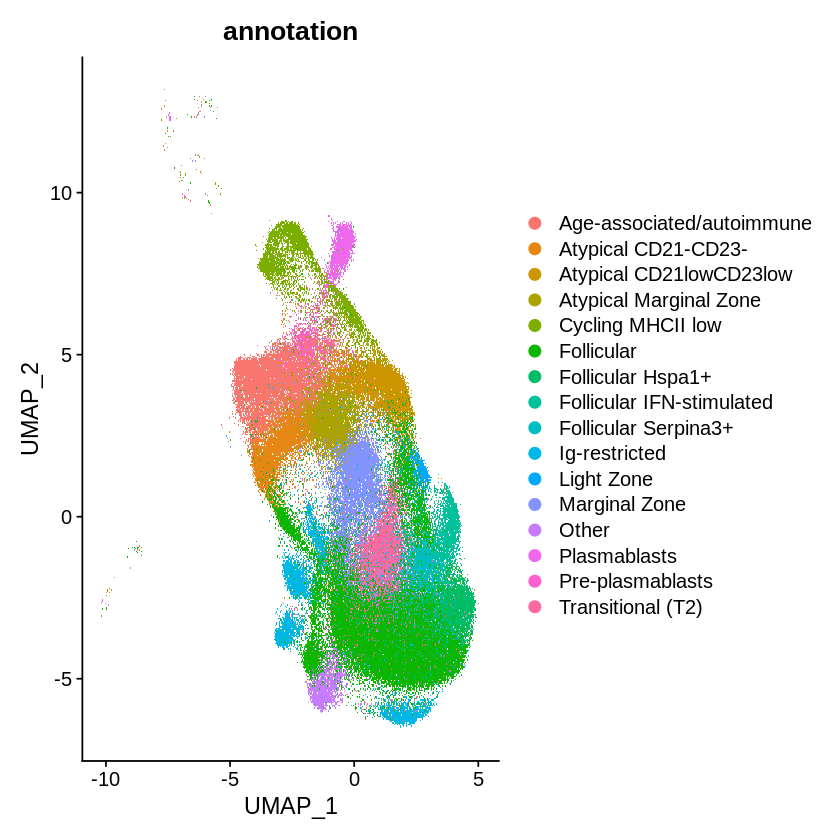

In [20]:
B_cell_annotation<- read_tsv("./data/B_cell_annotation.tsv", col_names = c("seurat_clusters", "annotation"))

B_cell_annotation$seurat_clusters<- factor(B_cell_annotation$seurat_clusters, levels = str_sort(B_cell_annotation$seurat_clusters, numeric = TRUE))
B_cell_annotated_meta<- left_join(B_cell@meta.data, B_cell_annotation)
write_tsv(x = B_cell_annotated_meta, "./data/B_cell_annotated_meta.tsv", col_names = TRUE)

B_cell_annotated_meta  %>% dim()
B_cell@meta.data  %>% dim()

B_cell$annotation<- as.factor(B_cell_annotated_meta$annotation)

DimPlot(B_cell, group.by = "annotation")


new_annotation<- paste0(B_cell$seurat_clusters, "_", B_cell$annotation)


B_cell$new_annotation<- factor(new_annotation, levels = str_sort(new_annotation  %>% unique(), numeric = TRUE))


B_cell$new_annotation  %>% table()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message in ValidateInput():
“B_cell_final.bcs will be replaced”


[2024-02-03 18:06:09] Initializing... 
[2024-02-03 18:06:09] Extracting expressions... 
[2024-02-03 18:06:09] Extracting metadata... 
[2024-02-03 18:06:09] Extracting dimred... 
[2024-02-03 18:06:09] Writing data... 


Warning message in dir.create(file.path(study.path, "main"), recursive = TRUE):
“'f632e003-1863-4e2f-81d1-ce852b969a4e/main' already exists”


[2024-02-03 18:06:09] Writing column sums... 
[2024-02-03 18:06:13] Writing matrices... 
[2024-02-03 18:08:13] Writing metadata... 
[2024-02-03 18:08:22] Writing cell embeddings... 
[2024-02-03 18:08:22] Writing intermediate embeddings... 


You created a large dataset with compression and chunking.
The chunk size is equal to the dataset dimensions.
If you want to read subsets of the dataset, you should testsmaller chunk sizes to improve read times.

You created a large dataset with compression and chunking.
The chunk size is equal to the dataset dimensions.
If you want to read subsets of the dataset, you should testsmaller chunk sizes to improve read times.



[2024-02-03 18:08:29] Writing general information... 
[2024-02-03 18:08:29] Compressing data... 


[1] TRUE

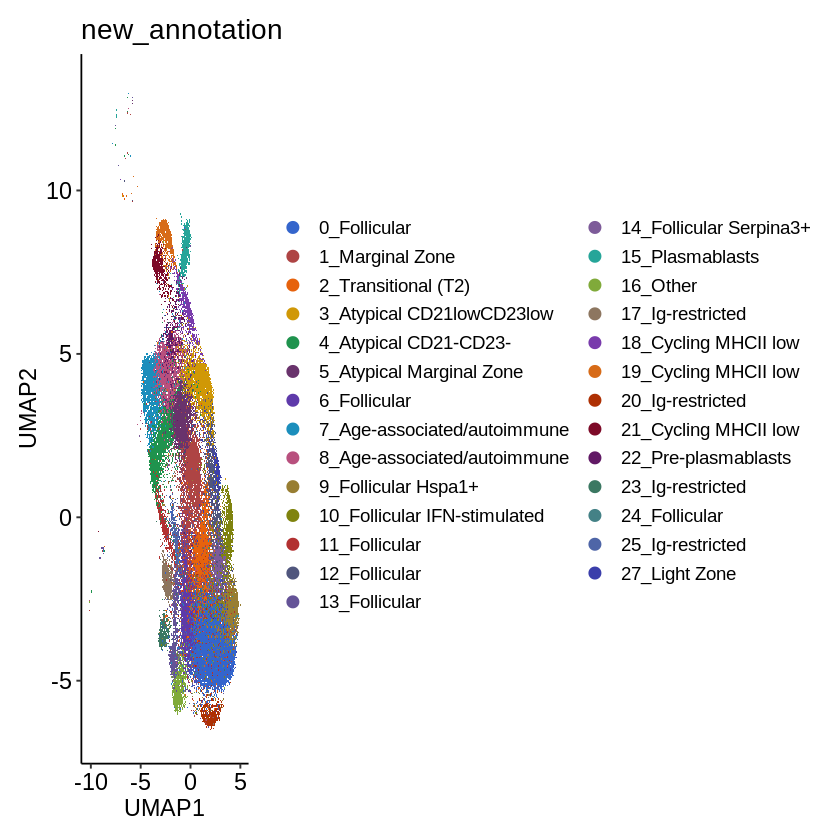

In [21]:
DimPlot(B_cell, group.by = "new_annotation", cols = B_cell_col$HEX_code) +
     theme_pubr() + labs(x = "UMAP1", y = "UMAP2") + 
    theme(text = element_text(size = 14), legend.position = 'right')
ggsave("./results/figures/3_B_cell_final_annotated_umap.pdf", width = 10, height = 5 )

saveRDS(object = B_cell, file = "./data/objects/B_cell_final.rds")

ExportSeurat(object = B_cell, bcs.path = "./data/objects/B_cell_final.bcs", overwrite=TRUE )

### non_B_non_T space

In [4]:
non_B_non_T_col<- read_excel(path = "./data/non_B_non_T_HEX-colors.xlsx", col_names = TRUE)
non_B_non_T_col$Cluster_number<- as.factor(non_B_non_T_col$Cluster_number)
non_B_non_T_col_meta<- left_join(non_B_non_T@meta.data, non_B_non_T_col, 
                                     by = c("seurat_clusters" = "Cluster_number"))

non_B_non_T$HEX_code<- non_B_non_T_col_meta$HEX_code

In [ ]:
# no finalized annotations

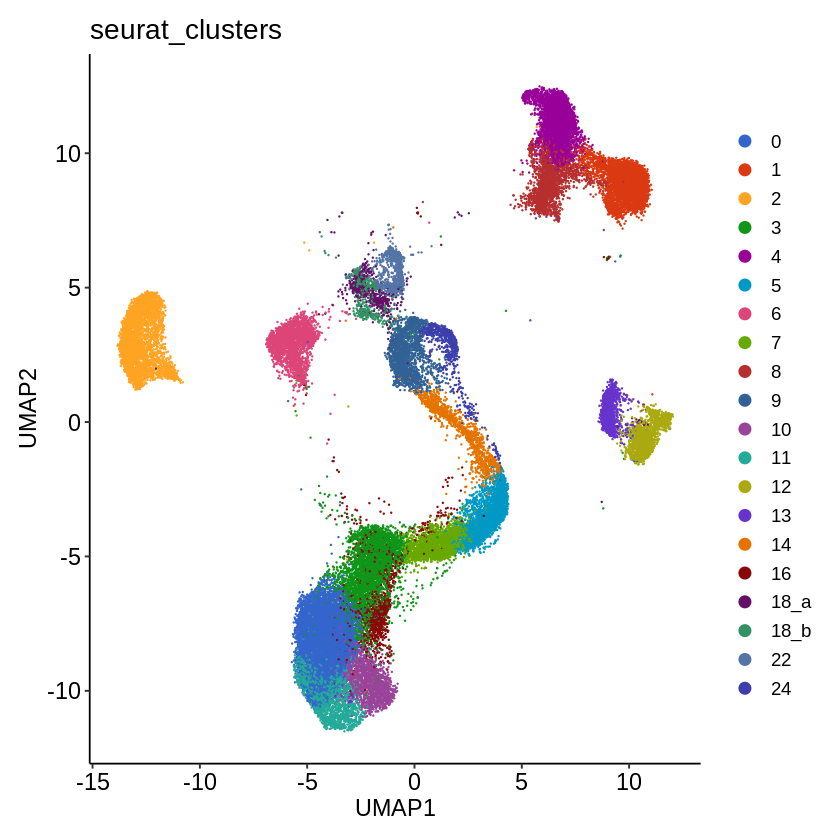

In [5]:
DimPlot(non_B_non_T, group.by = "seurat_clusters", cols = non_B_non_T_col$HEX_code) +
     theme_pubr() + labs(x = "UMAP1", y = "UMAP2") + theme(text = element_text(size = 14), legend.position = 'right')

ggsave(filename = "./results/figures/3_non_B_non_T_final_annotated_umap.pdf", width = 6.5, height = 5)

In [8]:
saveRDS(object = non_B_non_T, file = "./data/objects/non_B_non_T_final.rds")

ExportSeurat(object = non_B_non_T, bcs.path = "./data/objects/non_B_non_T_final.bcs")

[2024-01-28 17:34:00] Initializing... 
[2024-01-28 17:34:00] Extracting expressions... 
[2024-01-28 17:34:00] Extracting metadata... 
[2024-01-28 17:34:00] Extracting dimred... 
[2024-01-28 17:34:00] Writing data... 


Warning message in dir.create(file.path(study.path, "main"), recursive = TRUE):
“'f8673f92-ffbe-47c3-98b4-9affa064608b/main' already exists”


[2024-01-28 17:34:00] Writing column sums... 
[2024-01-28 17:34:03] Writing matrices... 
[2024-01-28 17:34:36] Writing metadata... 
[2024-01-28 17:34:42] Writing cell embeddings... 
[2024-01-28 17:34:43] Writing intermediate embeddings... 


You created a large dataset with compression and chunking.
The chunk size is equal to the dataset dimensions.
If you want to read subsets of the dataset, you should testsmaller chunk sizes to improve read times.

You created a large dataset with compression and chunking.
The chunk size is equal to the dataset dimensions.
If you want to read subsets of the dataset, you should testsmaller chunk sizes to improve read times.



[2024-01-28 17:34:45] Writing general information... 
[2024-01-28 17:34:45] Compressing data... 


[1] TRUE